# Gold Extraction Project

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

## Data Inspection

In [2]:
df_train = pd.read_csv("gold_recovery_train.csv")
df_test = pd.read_csv("gold_recovery_test.csv")
df_full = pd.read_csv("gold_recovery_full.csv")

In [3]:
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.shape

(16860, 87)

In [5]:
df_train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [6]:
df_train.dtypes

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

#### I will now check whether the recovery column is properly calculated.

In [7]:
C = df_train["rougher.output.concentrate_au"]
F = df_train["rougher.input.feed_au"]
T = df_train["rougher.output.tail_au"]
Recovery = C*(F-T)/(F*(C-T))*100
df_train["Recovery"] = Recovery
df_train[["rougher.output.recovery","Recovery"]]

,rougher.output.recovery,Recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


The above values show that the recovery was properly calculated.

## Difference of columns between both sets

In [8]:
train_test_columns = list(set(df_train.columns).intersection(set(df_test.columns)))
train_test_columns.sort
difference = pd.DataFrame(df_train.columns.difference(df_test.columns))
difference.info()
difference

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       35 non-null     object
dtypes: object(1)
memory usage: 408.0+ bytes


,0
0,Recovery
1,final.output.concentrate_ag
2,final.output.concentrate_au
3,final.output.concentrate_pb
4,final.output.concentrate_sol
5,final.output.recovery
6,final.output.tail_ag
7,final.output.tail_au
8,final.output.tail_pb
9,final.output.tail_sol


Above there's the list of columns present on the train set that aren't present on the test set, it seems that the third,fifth and eight steps of the process are the ones missing the most on the test set.

## Preprocessing Data

In [9]:
df_train[train_test_columns].isnull().sum()/df_train.shape[0]

date                                          0.000000
secondary_cleaner.state.floatbank3_a_level    0.006702
primary_cleaner.input.feed_size               0.000000
rougher.state.floatbank10_b_air               0.003144
rougher.input.feed_size                       0.024733
secondary_cleaner.state.floatbank2_b_air      0.009193
rougher.input.feed_pb                         0.013523
secondary_cleaner.state.floatbank5_b_air      0.005042
rougher.input.floatbank10_xanthate            0.020522
primary_cleaner.state.floatbank8_a_air        0.002372
secondary_cleaner.state.floatbank4_a_air      0.007651
rougher.state.floatbank10_d_air               0.003440
primary_cleaner.state.floatbank8_d_air        0.002313
primary_cleaner.state.floatbank8_d_level      0.001601
secondary_cleaner.state.floatbank6_a_level    0.005042
secondary_cleaner.state.floatbank4_a_level    0.006702
secondary_cleaner.state.floatbank4_b_air      0.005457
primary_cleaner.state.floatbank8_c_air        0.002254
rougher.in

We can see that there's a lot of missing data in the dataset, a number which can impact the ability of predicting, thus we need to handle the missing data. Since parameters that are next to each other tend to be close of time, we can use a technique called forward fill.

In [10]:
df_train["date"] = pd.to_datetime(df_train["date"])

In [11]:
df_train.sort_values("date",inplace = True)
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,Recovery
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [12]:
df_train[train_test_columns].fillna(method = "ffill")

,date,secondary_cleaner.state.floatbank3_a_level,primary_cleaner.input.feed_size,rougher.state.floatbank10_b_air,rougher.input.feed_size,secondary_cleaner.state.floatbank2_b_air,rougher.input.feed_pb,secondary_cleaner.state.floatbank5_b_air,rougher.input.floatbank10_xanthate,primary_cleaner.state.floatbank8_a_air,...,secondary_cleaner.state.floatbank5_b_level,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_b_level,primary_cleaner.state.floatbank8_a_level,secondary_cleaner.state.floatbank5_a_level,primary_cleaner.state.floatbank8_b_level,rougher.input.feed_au,rougher.state.floatbank10_f_air,rougher.state.floatbank10_a_air,rougher.state.floatbank10_c_air
0,2016-01-15 00:00:00,-495.262817,7.25,1603.011353,55.486599,23.893660,2.284912,8.079666,6.007990,1549.775757,...,-500.470978,6.005818,-434.715027,-498.912140,-498.310211,-516.403442,6.486150,1416.354980,999.706909,1602.375000
1,2016-01-15 01:00:00,-500.085473,7.25,1600.754587,57.278666,23.889530,2.266033,7.984757,6.005766,1576.166671,...,-500.582168,6.012594,-449.953435,-500.904965,-500.169983,-499.865889,6.478583,1399.719514,1000.286398,1600.479580
2,2016-01-15 02:00:00,-499.442343,7.25,1599.337330,57.510649,23.886657,2.159622,8.013877,6.197377,1601.556163,...,-500.517572,6.204633,-450.008530,-499.997791,-500.129135,-500.607762,6.362222,1400.316682,999.719565,1599.672797
3,2016-01-15 03:00:00,-500.008812,7.25,1600.059442,57.792734,23.955516,2.037807,7.977324,6.203177,1599.968720,...,-500.255908,6.196578,-450.619948,-500.951778,-499.201640,-499.677094,6.118189,1400.234743,999.814770,1600.012842
4,2016-01-15 04:00:00,-500.083811,7.25,1600.208824,56.047189,23.955345,1.786875,7.894242,6.198826,1601.339707,...,-500.356035,6.194897,-449.599614,-498.975456,-501.686727,-500.323246,5.663707,1401.160227,999.678690,1600.357732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,-499.953431,6.50,1149.807890,85.718304,29.906659,4.617558,13.001114,9.158609,1648.421193,...,-500.155694,9.156069,-498.789721,-400.382169,-499.834374,-400.359661,5.335862,849.758091,1199.245914,1047.963596
16856,2018-08-18 07:59:59,-500.384612,6.50,1147.675196,119.499241,29.921795,4.144989,12.954048,9.304952,1649.820162,...,-499.895163,9.297924,-500.608341,-399.930973,-500.395178,-399.721222,4.838619,850.013123,1196.569267,1048.565741
16857,2018-08-18 08:59:59,-500.067268,6.50,1149.942902,122.262690,29.990533,4.020002,13.023431,9.299606,1649.166761,...,-499.914391,9.300133,-501.717903,-399.888631,-500.451156,-399.677571,4.525061,850.455635,1204.866639,1049.604390
16858,2018-08-18 09:59:59,-499.608392,6.50,1154.087804,123.742430,29.968453,3.902537,12.992404,9.297709,1646.547763,...,-499.976268,9.297194,-500.036580,-398.977083,-499.272871,-400.383265,4.362781,851.345606,1201.904177,1054.009756


In [13]:
df_train[train_test_columns].describe()

,secondary_cleaner.state.floatbank3_a_level,primary_cleaner.input.feed_size,rougher.state.floatbank10_b_air,rougher.input.feed_size,secondary_cleaner.state.floatbank2_b_air,rougher.input.feed_pb,secondary_cleaner.state.floatbank5_b_air,rougher.input.floatbank10_xanthate,primary_cleaner.state.floatbank8_a_air,secondary_cleaner.state.floatbank4_a_air,...,secondary_cleaner.state.floatbank5_b_level,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_b_level,primary_cleaner.state.floatbank8_a_level,secondary_cleaner.state.floatbank5_a_level,primary_cleaner.state.floatbank8_b_level,rougher.input.feed_au,rougher.state.floatbank10_f_air,rougher.state.floatbank10_a_air,rougher.state.floatbank10_c_air
count,16747.000000,16860.000000,16807.000000,16443.000000,16705.000000,16632.000000,16775.000000,16514.000000,16820.000000,16731.000000,...,16776.000000,14956.000000,16807.000000,16827.000000,16775.000000,16833.000000,16777.000000,16802.000000,16807.000000,16807.000000
mean,-493.470026,7.297285,1252.285954,58.676444,23.619503,3.218931,12.377241,5.366609,1521.291691,19.101874,...,-498.956257,5.792970,-475.443395,-505.811103,-500.230146,-507.346105,7.170717,983.384202,1077.201302,1229.567445
std,85.296428,0.619166,331.076715,23.922591,8.144236,1.477263,6.219989,1.940766,380.064453,6.883163,...,82.146207,1.294180,70.051458,77.640285,76.983542,79.830738,3.002113,275.426261,291.800894,344.840251
min,-799.926254,1.080000,-0.759568,9.659576,0.000000,0.000000,0.427084,0.000003,0.000000,0.000000,...,-800.258209,0.000010,-650.437575,-800.037388,-799.741097,-800.409770,0.000000,-2.636171,-0.345168,-0.378521
25%,-500.236661,6.940000,1196.415722,47.575879,20.110141,2.551143,8.925586,4.802531,1503.883158,14.508299,...,-500.147603,5.097006,-500.284895,-500.414946,-500.530594,-500.491143,6.203083,900.029475,999.636979,1100.084257
50%,-499.908346,7.285000,1299.649429,54.104257,26.981647,3.297050,11.092839,5.767015,1601.139322,19.986958,...,-499.933330,5.995942,-499.837368,-499.951772,-499.784231,-499.985447,7.443530,999.828611,1001.310190,1298.324087
75%,-495.885262,7.700000,1432.326657,65.051064,28.094066,4.181842,15.979467,6.501621,1699.304472,24.983961,...,-498.418000,6.695277,-400.865979,-499.412584,-496.531781,-499.436173,8.965193,1099.734617,1299.577654,1448.560325
max,-191.678810,10.470000,1809.194008,484.967466,51.093216,7.142594,39.846228,31.493331,2079.531340,60.000000,...,-120.190931,9.698407,9.457822,-330.134203,-275.073125,-336.237097,14.093363,1950.493751,1521.980372,2499.129174


## Concentration of metals by purification stages

C:\Users\rodri\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


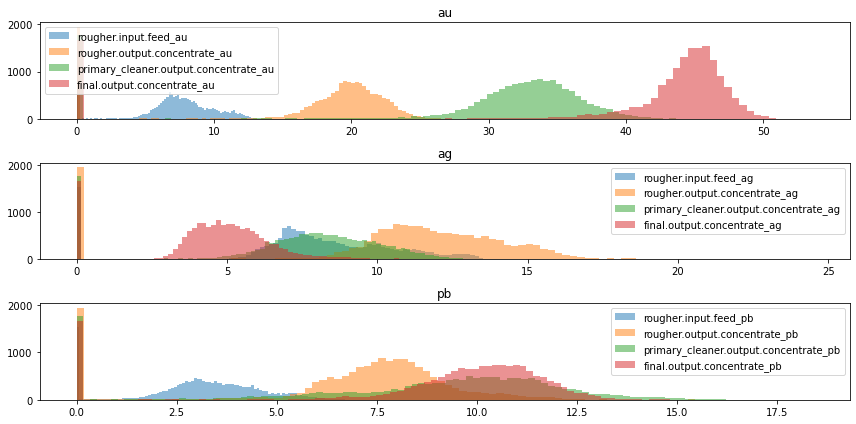

In [14]:
metals = ["au","ag","pb"]
columns = ["rougher.input.feed","rougher.output.concentrate","primary_cleaner.output.concentrate","final.output.concentrate"]
fig = plt.figure(figsize=(12,6))
for i,metal in enumerate(metals):
    for col in columns:
        plt.subplot(3,1,i+1)
        plt.hist(df_train[col+"_"+metal],bins=100,label=col+"_"+metal, alpha = .5);
    plt.title(metal)
    plt.legend()
    
plt.tight_layout()
plt.show()

This plot shows us that there's an outlier issue, which I will need to fix in order to produce more accurate predictions later on. In regards to concentration we can observe that graphically in regards to gold each stage makes gold more concentrated than the previous purification stage, in regards to silver it seems that it decreases concentration after each purification step and lead follows the same trend as gold and increases concentration every stage but not as much as gold

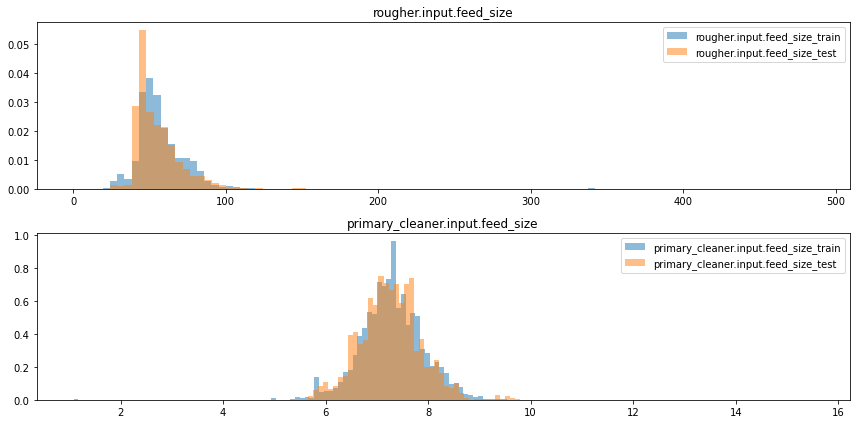

In [15]:
columns = ["rougher.input.feed_size","primary_cleaner.input.feed_size"]
fig = plt.figure(figsize = (12,6))
for i,col in enumerate(columns):
    plt.subplot(2,1,i+1)
    plt.hist(df_train[col],bins = 100,label=col+"_train",alpha=.5,density = 1);
    plt.hist(df_test[col],bins = 100,label=col+"_test",alpha=.5,density = 1);
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

In here we can see that regarding the feed size(rough and primary cleaner) the test set and the train set are quite similar, they don't diviate much. By this we can assume that the distributions are similar.

I will now address the outliers, in order to address outliers I will replace the zeros with nulls.

In [16]:
metals = ["au","ag","pb"]
columns = ["rougher.output.concentrate","primary_cleaner.output.concentrate","final.output.concentrate"]
for i,metal in enumerate(metals):
    for col in columns:
        df_train[df_train[col+"_"+metal] < 0.01] = np.nan
for col in ["final.output.recovery","rougher.output.recovery"]:
    df_train[df_train[col]<0.01] = np.nan

In [17]:
df_train.loc[:,train_test_columns] = df_train.loc[:,train_test_columns].fillna(method = "ffill")

In [18]:
df_train.dropna(subset=["final.output.recovery","rougher.output.recovery"],inplace = True)

In [19]:
df_train.isnull().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  207
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_b_air        0
secondary_cleaner.state.floatbank5_b_level      0
secondary_cleaner.state.floatbank6_a_air        0
secondary_cleaner.state.floatbank6_a_level      0
Recovery                                        0
Length: 88, dtype: int64

C:\Users\rodri\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


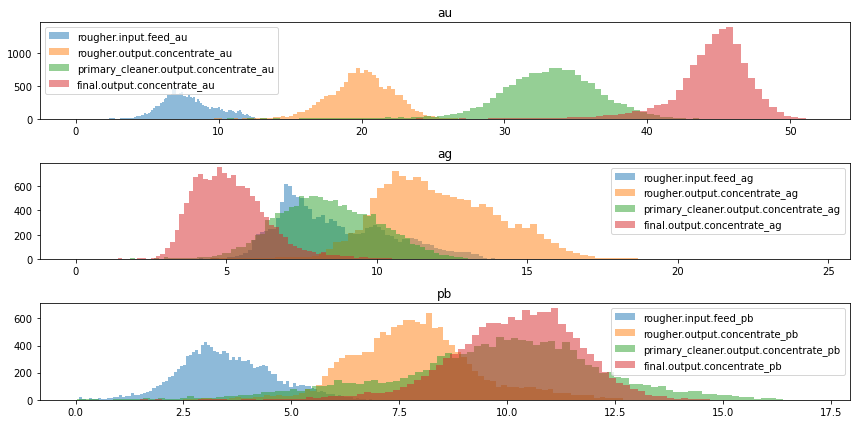

In [20]:
metals = ["au","ag","pb"]
columns = ["rougher.input.feed","rougher.output.concentrate","primary_cleaner.output.concentrate","final.output.concentrate"]
fig = plt.figure(figsize=(12,6))
for i,metal in enumerate(metals):
    for col in columns:
        plt.subplot(3,1,i+1)
        plt.hist(df_train[col+"_"+metal],bins=100,label=col+"_"+metal, alpha = .5);
    plt.title(metal)
    plt.legend()
    
plt.tight_layout()
plt.show()

It's now visible that the outliers have dissapeared. 

In [21]:
df_test = df_test.merge(df_full[["date","final.output.recovery","rougher.output.recovery"]],
                       how = "left", on="date")
for col in ["final.output.recovery","rougher.output.recovery"]:
    df_test[df_test[col]<0.001]=np.nan
df_test.dropna(subset = ["final.output.recovery","rougher.output.recovery"],inplace = True)

In [22]:
df_test["date"] = pd.to_datetime(df_test.date)
df_test.sort_values("date",inplace = True)
df_test.loc[:,train_test_columns] = df_test.loc[:,train_test_columns].fillna(method="ffill")
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


In [23]:
df_test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Now that I have taken care of outliers and missing data, I can now build the predictive model.

## Model Building

In [26]:
features = train_test_columns
target = ["final.output.recovery","rougher.output.recovery"]

In [28]:
features

['secondary_cleaner.state.floatbank3_a_level',
 'primary_cleaner.input.feed_size',
 'rougher.state.floatbank10_b_air',
 'rougher.input.feed_size',
 'secondary_cleaner.state.floatbank2_b_air',
 'rougher.input.feed_pb',
 'secondary_cleaner.state.floatbank5_b_air',
 'rougher.input.floatbank10_xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'secondary_cleaner.state.floatbank4_a_air',
 'rougher.state.floatbank10_d_air',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'secondary_cleaner.state.floatbank6_a_level',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'primary_cleaner.state.floatbank8_c_air',
 'rougher.input.floatbank10_sulfate',
 'primary_cleaner.input.sulfate',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank6_a_air',
 'rougher.state.floatbank10_d_level',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondar

In [29]:
X_train,X_test = df_train[features].values,df_test[features].values
Y_train,Y_test = df_train[target].values,df_test[target].values

In [30]:
st = StandardScaler()
lr = LinearRegression()
lr.fit(st.fit_transform(X_train),Y_train)

LinearRegression()

In [31]:
def smape(y_true,y_pred):
    return (np.abs(y_true - y_pred)/ ((np.abs(y_true)+np.abs(y_pred))/2)).mean()

In [32]:
smape(Y_test[:,0],lr.predict(st.transform(X_test))[:,0])

0.08142228595257257

In [33]:
smape(Y_test[:,1],lr.predict(st.transform(X_test))[:,1])

0.04897776565459418

In [34]:
def final_smape(y_true,y_pred):
    smape_rougher = smape(y_true[:,1],y_pred[:,1])
    smape_final = smape(y_true[:,0],y_pred[:,0])
    return 0.25*smape_rougher +  0.75*smape_final

In [35]:
final_smape(Y_test,lr.predict(st.transform(X_test)))

0.07331115587807797

## Linear Model Cross Val


In [37]:
smape_score = make_scorer(final_smape,greater_is_better = False)

In [38]:
scores_linear = cross_val_score(lr,X_train,Y_train,cv=5,scoring=smape_score)
print("Mean: ",scores_linear.mean()*-1)
scores_linear*-1

Mean:  0.10095753532672458


array([0.12193273, 0.0898631 , 0.09393131, 0.07852365, 0.12053688])

 I'll now use a decision tree model to compare scores.

## Decision Tree Model

In [41]:
parameters = {
    "max_depth": range(1,6)
}
dtr_1 = DecisionTreeRegressor(max_depth = i,random_state = 12345)
clf = GridSearchCV(dtr_1,parameters,scoring = smape_score)
clf.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=2, random_state=12345),
             param_grid={'max_depth': range(1, 6)},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [42]:
clf.best_score_*-1

0.09282699303070593

In [43]:
clf.best_params_

{'max_depth': 3}

In [46]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, Y_train)
dummy_regr.predict(X_test)

array([[66.80459545, 84.51618459],
       [66.80459545, 84.51618459],
       [66.80459545, 84.51618459],
       ...,
       [66.80459545, 84.51618459],
       [66.80459545, 84.51618459],
       [66.80459545, 84.51618459]])

In [47]:
dummy_regr.score(X_test, Y_test)*-1

0.12131786714721648

In [48]:
final_smape(Y_test,dummy_regr.predict(X_test))

0.07776134140377196

This means that the average error is around 7.7%, this means that this model is outperformed by linear regression

# Conclusion

In the first section of the project I calculated the recovery and compared the result to an already calculated column to compare the accuracy, the difference between the two was a miniscule 9.444891926100695e-15 (which is affected by the mishandling of long floats), in the second section I checked the columns that were missing on the test set that were on the training set just by simply using the difference method. Afterwards on the third section I handled the missing data and the wrong datatypes, I changed the type of date to datetime, I then used a forward fill technique to fill the missing data. On the 4th section I checked the concentration of the metals(AU , AG and PB) in different purification stages and noticed an issue with outliers that I would take care of after, after doing so I compared the feed particle size of both datasets to see that the distributions did not vary significantly which means the model evaluation isn't incorrect. The model building part came next, I did the usual of assigning the target and the features, I scaled them and then I apply the linear regression technique, after doing so I calculated the smape(symmetric mean absolute percentage error) and then the final smape. In the 6th and 5th sections I train the linear regression model, Decision Tree model and dummy regressor and after comparing both the one that comes with the best value is the dummy regressor, the dummy regressor models has a lower value than the other models.